# Model Training - Base (base) - merged cleaned

### 0. Imports

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    BatchNormalization,
    Activation,
    MaxPooling2D
)
from keras.models import Sequential
from keras.metrics import Precision, Recall
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

### 1. Paths

In [4]:
# DATASET_BASE_TRAIN_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/train_resized"
# DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_resized"
# DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_merged"
DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_merged_cleaned"

# DATASET_BASE_TRAIN_PATH = "../new_data"

# DATASET_BASE_TEST_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/test_resized"
DATASET_BASE_TEST_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/test_resized"

### 2. Data preprocessing

In [7]:
batch_size  = 32
img_size = 224

train_validation_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_validation_data_generator.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True,
)

validation_generator = train_validation_data_generator.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=True,
)

Found 23689 images belonging to 7 classes.
Found 5919 images belonging to 7 classes.


### 5. Model creating

In [8]:
CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [12]:
checkpoint = ModelCheckpoint(
    filepath="./model_base_base_merged_cleaned.h5",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1,
    min_lr=0.00001,
)

callbacks_list = [early_stopping, checkpoint, reduce_learning_rate]

In [13]:
n_classes = len(CATEGORIES)

model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(img_size,img_size,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512, (3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes, activation='softmax'))

In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Precision(class_id=0, name='precision_angry'),
        Precision(class_id=1, name='precision_disgust'),
        Precision(class_id=2, name='precision_fear'),
        Precision(class_id=3, name='precision_happy'),
        Precision(class_id=4, name='precision_neutral'),
        Precision(class_id=5, name='precision_sad'),
        Precision(class_id=6, name='precision_surprise'),
        Recall(name='recall'),
        Recall(class_id=0, name='recall_angry'),
        Recall(class_id=1, name='recall_disgust'),
        Recall(class_id=2, name='recall_fear'),
        Recall(class_id=3, name='recall_happy'),
        Recall(class_id=4, name='recall_neutral'),
        Recall(class_id=5, name='recall_sad'),
        Recall(class_id=6, name='recall_surprise'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     2

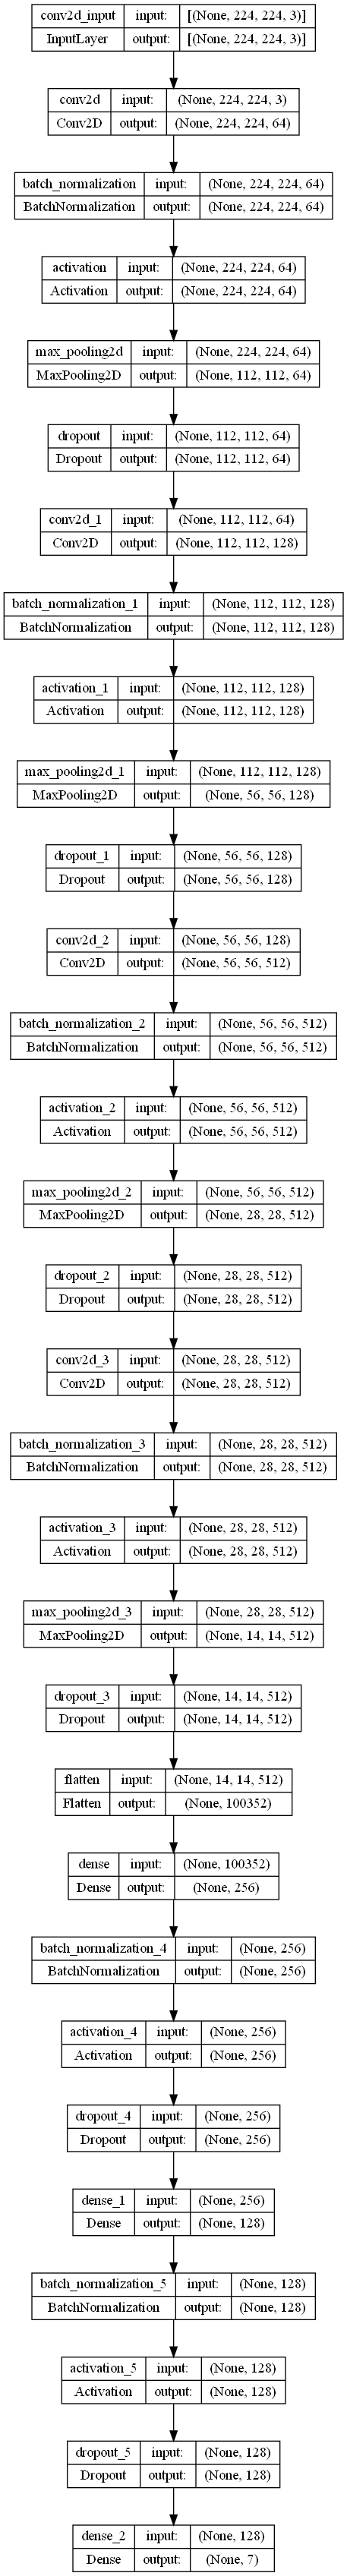

In [15]:
plot_model(model, to_file='model_base_base_merged_cleaned.png', show_shapes=True, show_layer_names=True)

### 6. Model training

In [16]:
epochs = 50

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size,
    callbacks=callbacks_list,
)

Epoch 1/50
740/740 [==============================] - ETA: 0s - loss: 1.7473 - accuracy: 0.3174 - precision: 0.5317 - precision_angry: 0.2432 - precision_disgust: 0.0476 - precision_fear: 0.2500 - precision_happy: 0.5942 - precision_neutral: 0.4137 - precision_sad: 0.2328 - precision_surprise: 0.5980 - recall: 0.0999 - recall_angry: 0.0109 - recall_disgust: 0.0020 - recall_fear: 0.0071 - recall_happy: 0.2630 - recall_neutral: 0.0567 - recall_sad: 0.0139 - recall_surprise: 0.1782
Epoch 1: val_loss improved from inf to 1.65456, saving model to .\model_base_base_merged_cleaned.h5
740/740 [==============================] - 4317s 6s/step - loss: 1.7473 - accuracy: 0.3174 - precision: 0.5317 - precision_angry: 0.2432 - precision_disgust: 0.0476 - precision_fear: 0.2500 - precision_happy: 0.5942 - precision_neutral: 0.4137 - precision_sad: 0.2328 - precision_surprise: 0.5980 - recall: 0.0999 - recall_angry: 0.0109 - recall_disgust: 0.0020 - recall_fear: 0.0071 - recall_happy: 0.2630 - recall_

### 7. Evaluation - Test set

In [5]:
from keras.models import load_model

model = load_model("model_base_base_merged_cleaned.h5")

In [6]:
test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(
    DATASET_BASE_TEST_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [7]:
model.evaluate(test_generator)

225/225 [==============================] - 394s 2s/step - loss: 1.2350 - accuracy: 0.5191 - precision: 0.7167 - precision_angry: 0.6875 - precision_disgust: 0.3750 - precision_fear: 0.4933 - precision_happy: 0.8387 - precision_neutral: 0.6376 - precision_sad: 0.5534 - precision_surprise: 0.7793 - recall: 0.3564 - recall_angry: 0.1837 - recall_disgust: 0.4054 - recall_fear: 0.2168 - recall_happy: 0.6652 - recall_neutral: 0.3025 - recall_sad: 0.0457 - recall_surprise: 0.6077


[1.2350184917449951,
 0.5190861225128174,
 0.7167273759841919,
 0.6875,
 0.375,
 0.4933333396911621,
 0.8386638164520264,
 0.6376068592071533,
 0.553398072719574,
 0.779321014881134,
 0.35636666417121887,
 0.1837160736322403,
 0.4054054021835327,
 0.216796875,
 0.6651634573936462,
 0.3025141954421997,
 0.045709703117609024,
 0.6077015399932861]